In [1]:
from tools.data_reader import *
from tools.neural_network_integrator import *
from tools.visualization import *
from tools.runge_kutta_method import *
from models.nn import *
from models.vae import *

%reload_ext autoreload
%autoreload 2

In [2]:
# data prepocessing
file_path = "data/postvis_super900.traj"
columns, df_selected, train_data, val_data = data_reader(
    file_path, train_percentage=0.9, test_percentage=0.1
)
train_data.shape, val_data.shape, train_data[0, :, :]

startX-PID1      36.675028
endX-PID1        36.675028
simTime         378.251226
startY-PID1       4.558513
endY-PID1         4.558513
endTime-PID1    378.987186
Name: 136723, dtype: float64


((130581, 2, 3),
 (14510, 2, 3),
 array([[ 36.67502823,  36.67502823, 378.25122585],
        [  4.55851275,   4.55851275, 378.98718639]]))

### NN + Supermarket Scenario

In [5]:
# parameters of neural network
lr = 0.0001
epochs = 200
batch_size = 512
width = 3
# setup the model
model = Neural_network(width=width)
# train the model
train_loss_data, val_loss_data = train(
    model,
    lr,
    epochs,
    train_data,
    val_data,
    batch_size,
    early_stopping_step=2,
    method="kutta",
)


[0. 0. 0. ... 0. 0. 0.]


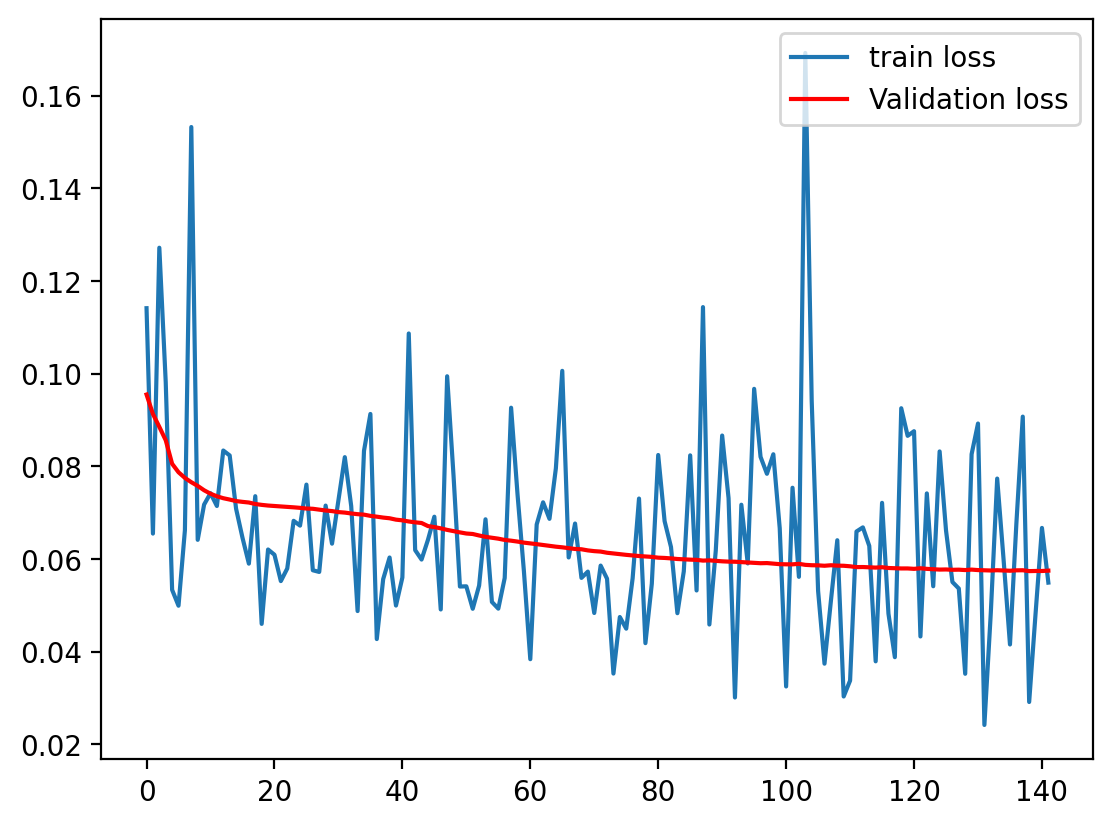

In [6]:
plot_train_val_loss(train_loss_data, val_loss_data)
print(val_loss_data)

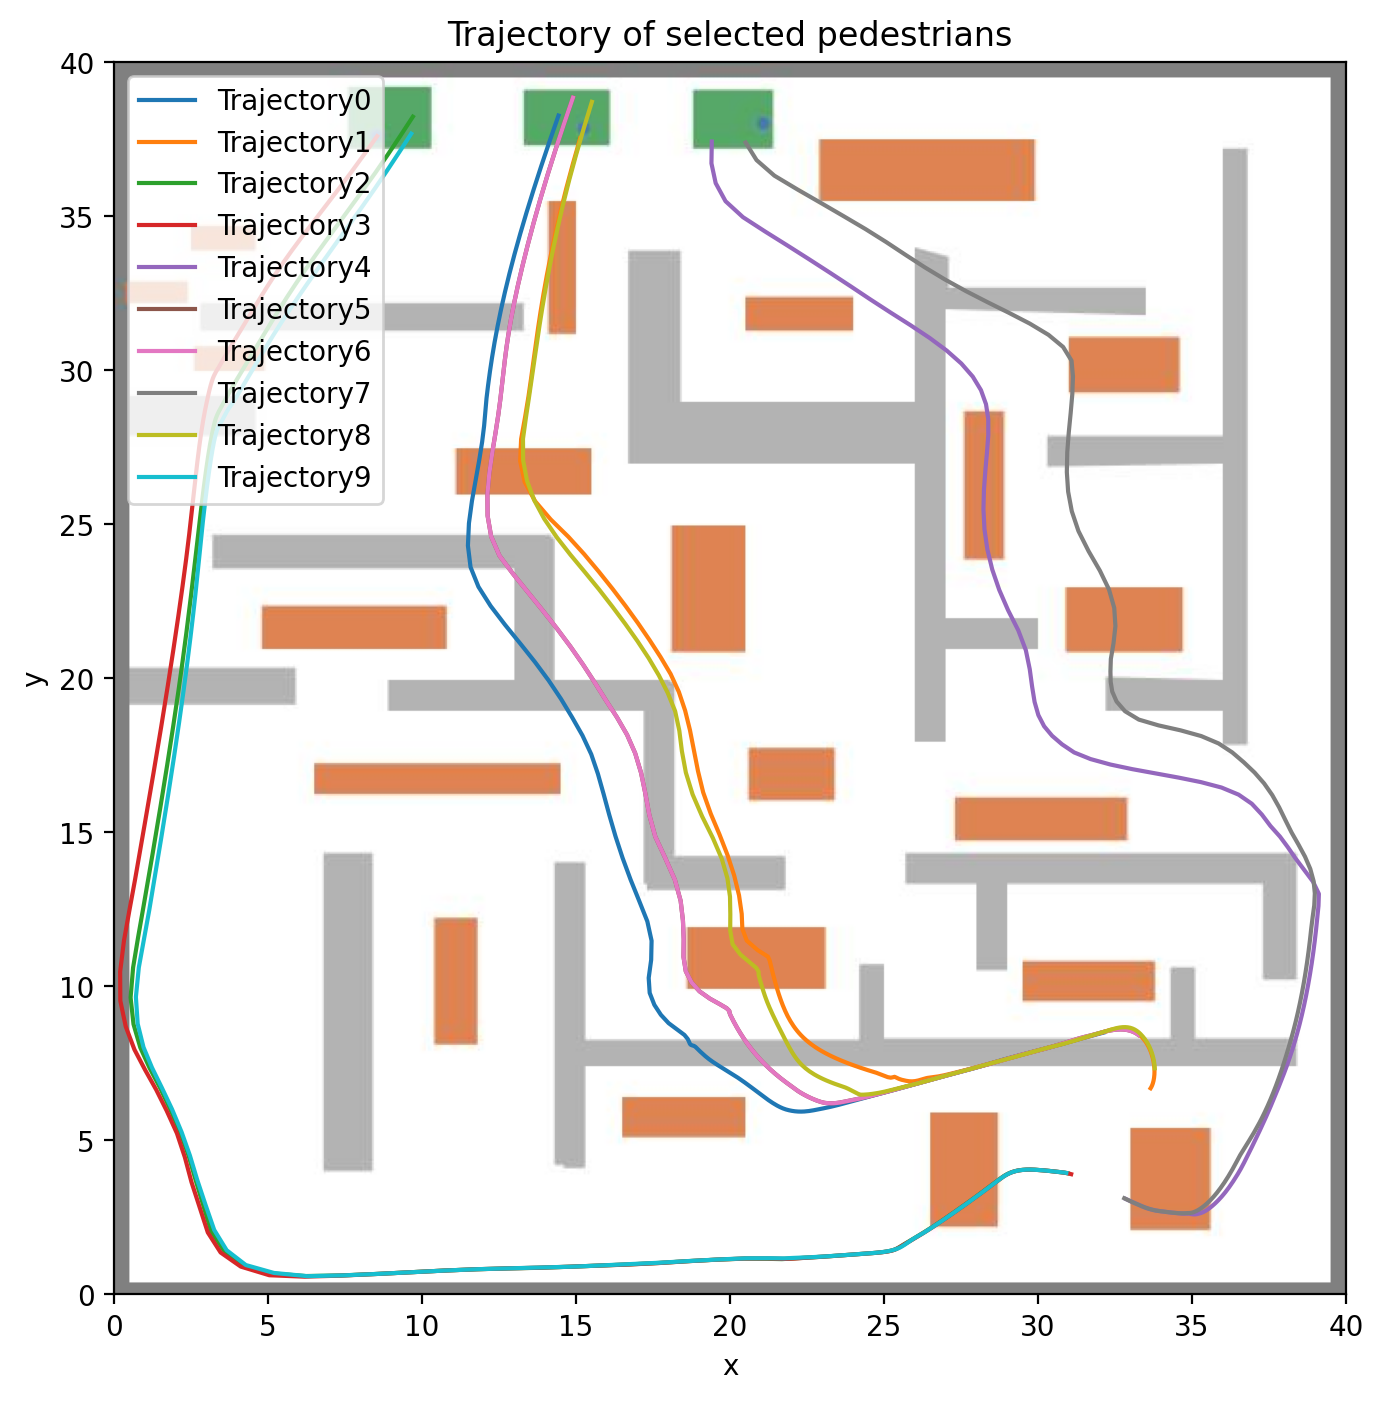

In [7]:
# simluate the trajectory
T_end = 335
num_selected_peds = 10
highest_num_ped = 20
traj = simulateRandomKutta(num_selected_peds, highest_num_ped, T_end, model, file_path)
image_name = "Task4.1 - Supermarket_NN_Kutta.png"
plot_traj_supermarket(num_selected_peds, traj, image_name)

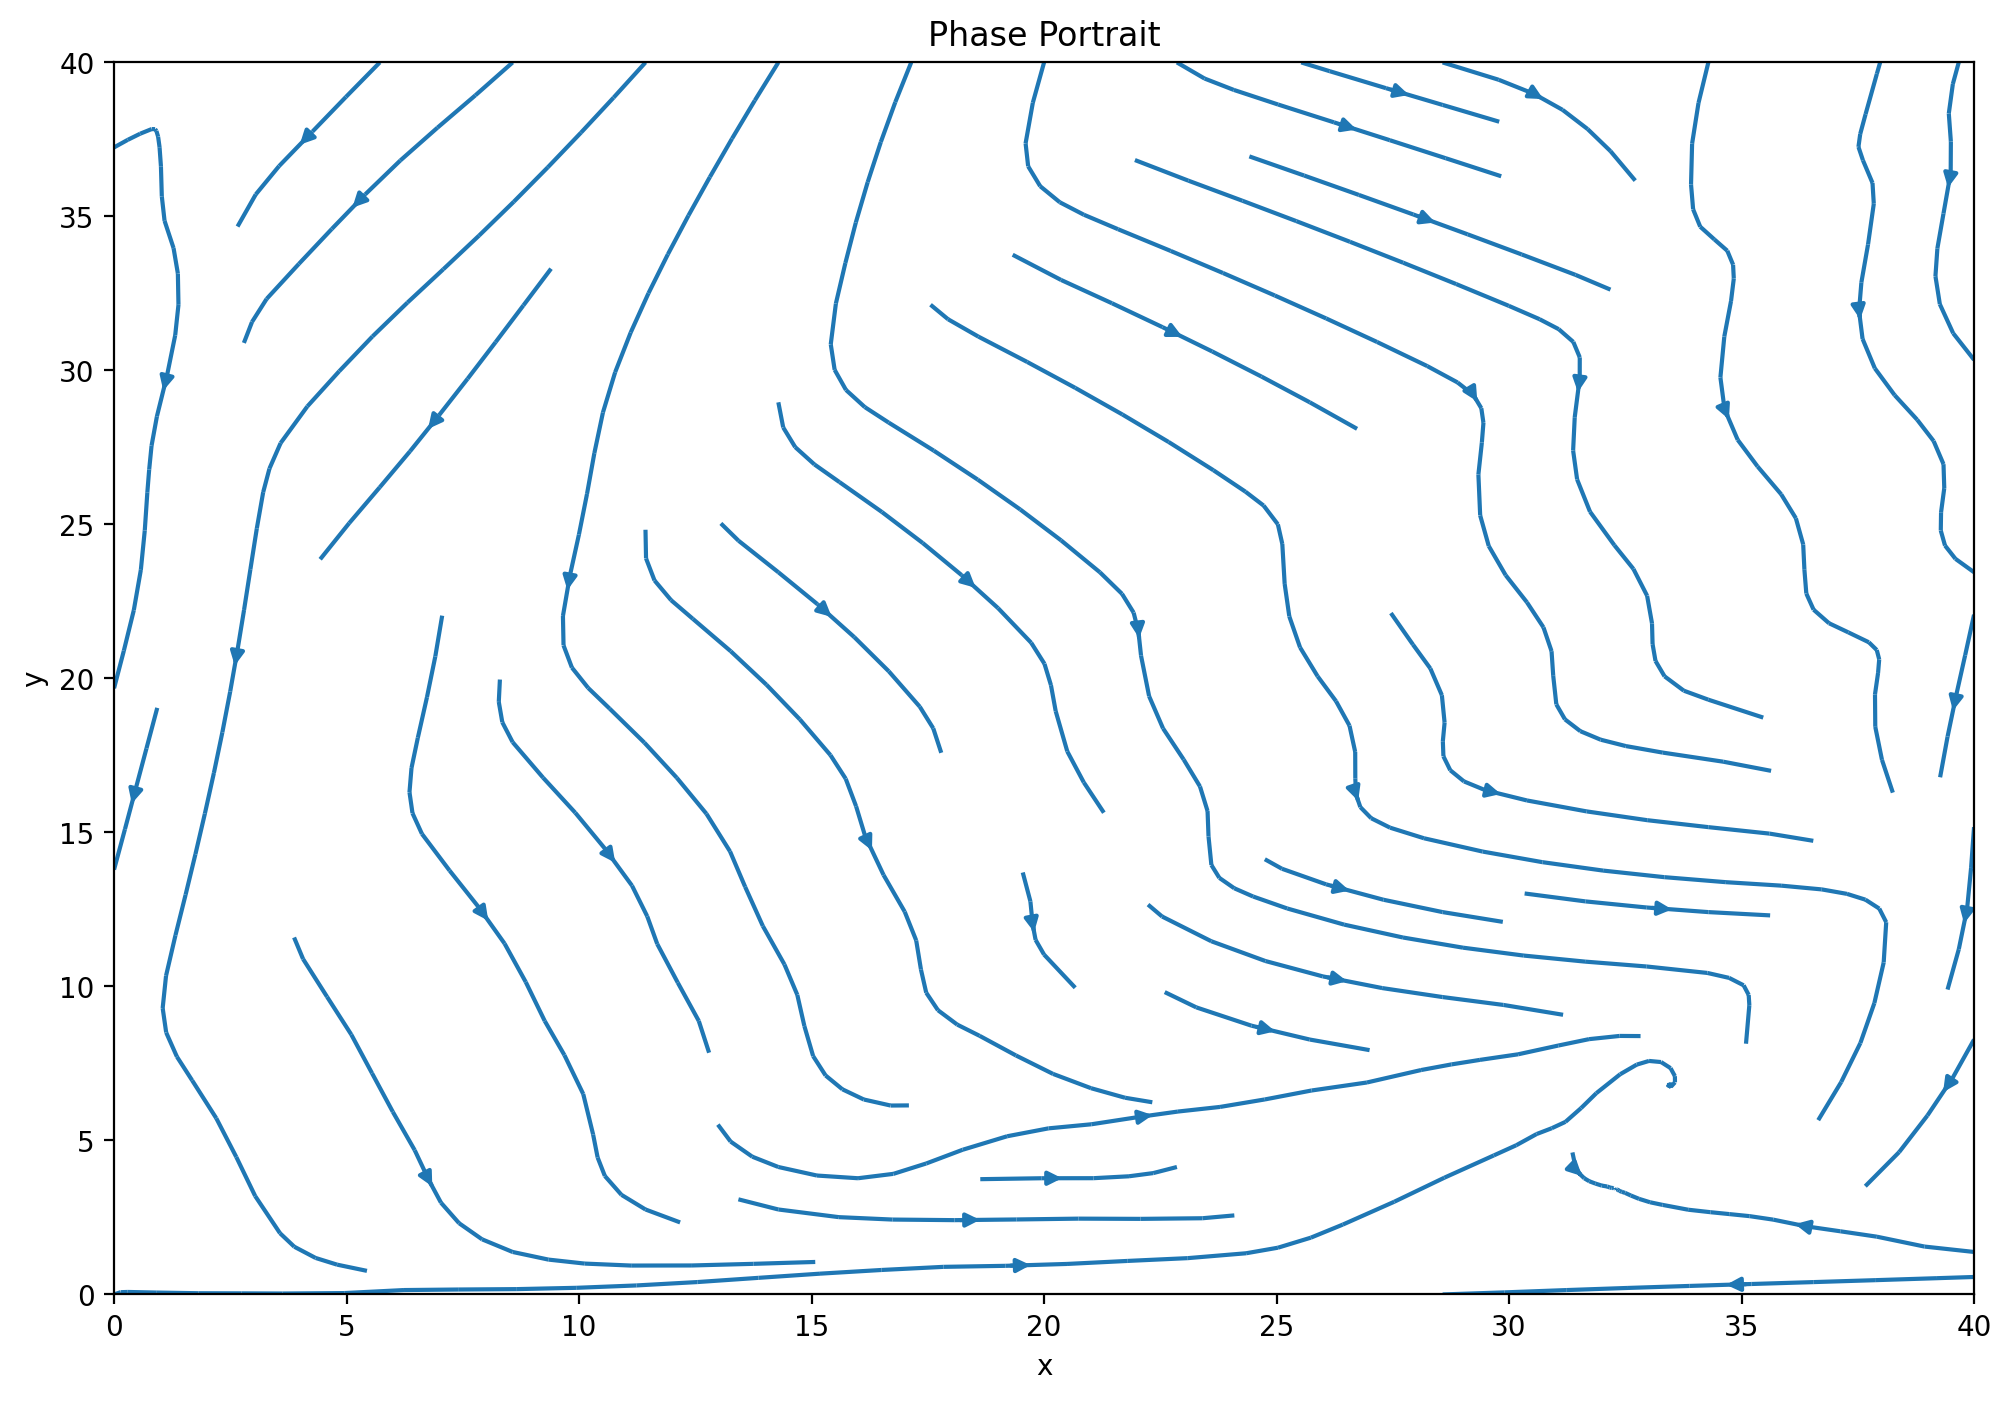

In [8]:
# plot the phase portrait
X, Y, U, V = phase_portrait(model)
plot_phase_portrait(X, Y, U, V, background=None)

### VAE + Supermarket Scenario

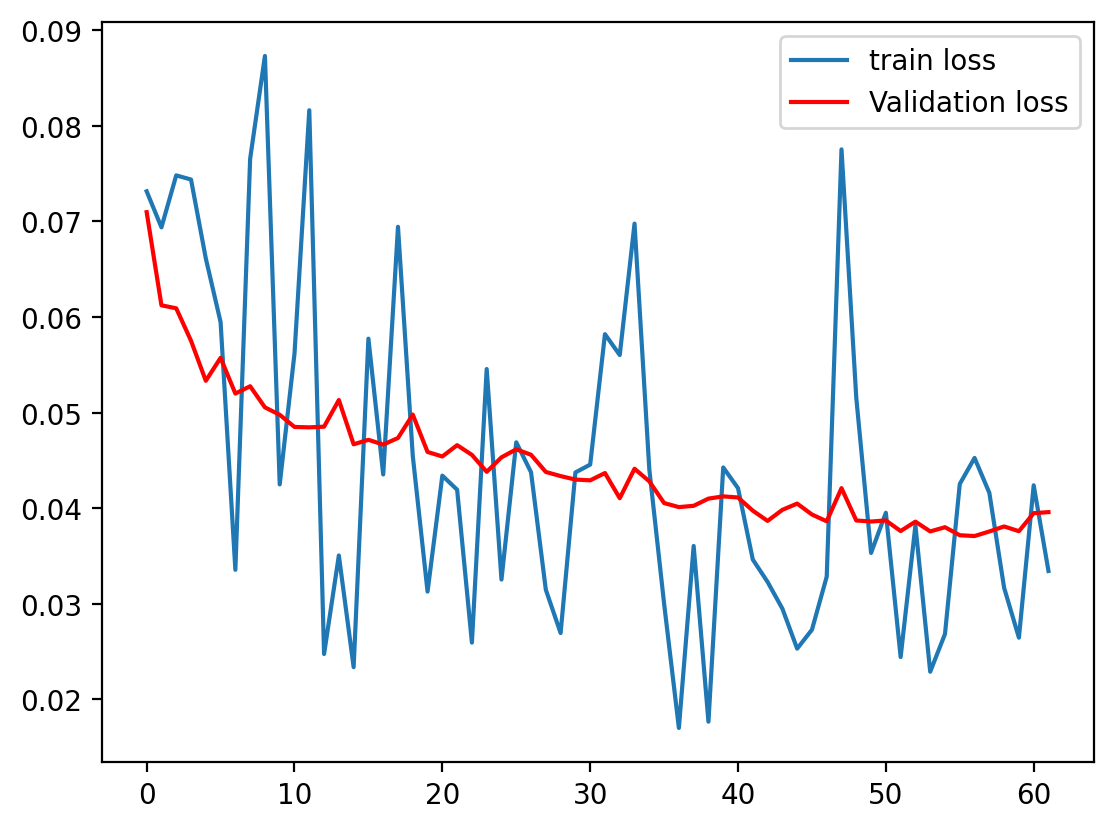

In [20]:
# parameters of neural network
lr = 0.0001
epochs = 500
batch_size = 512
width = 3
input_size = 2
output_size = 2
latent_dims = 2
# setup the model
vae = VariationalAutoencoder(latent_dims, input_size, output_size)
# train the model
train_loss_data, val_loss_data = train(
    vae,
    lr,
    epochs,
    train_data,
    val_data,
    batch_size,
    early_stopping_step=3,
    method="kutta",
)
plot_train_val_loss(train_loss_data, val_loss_data)

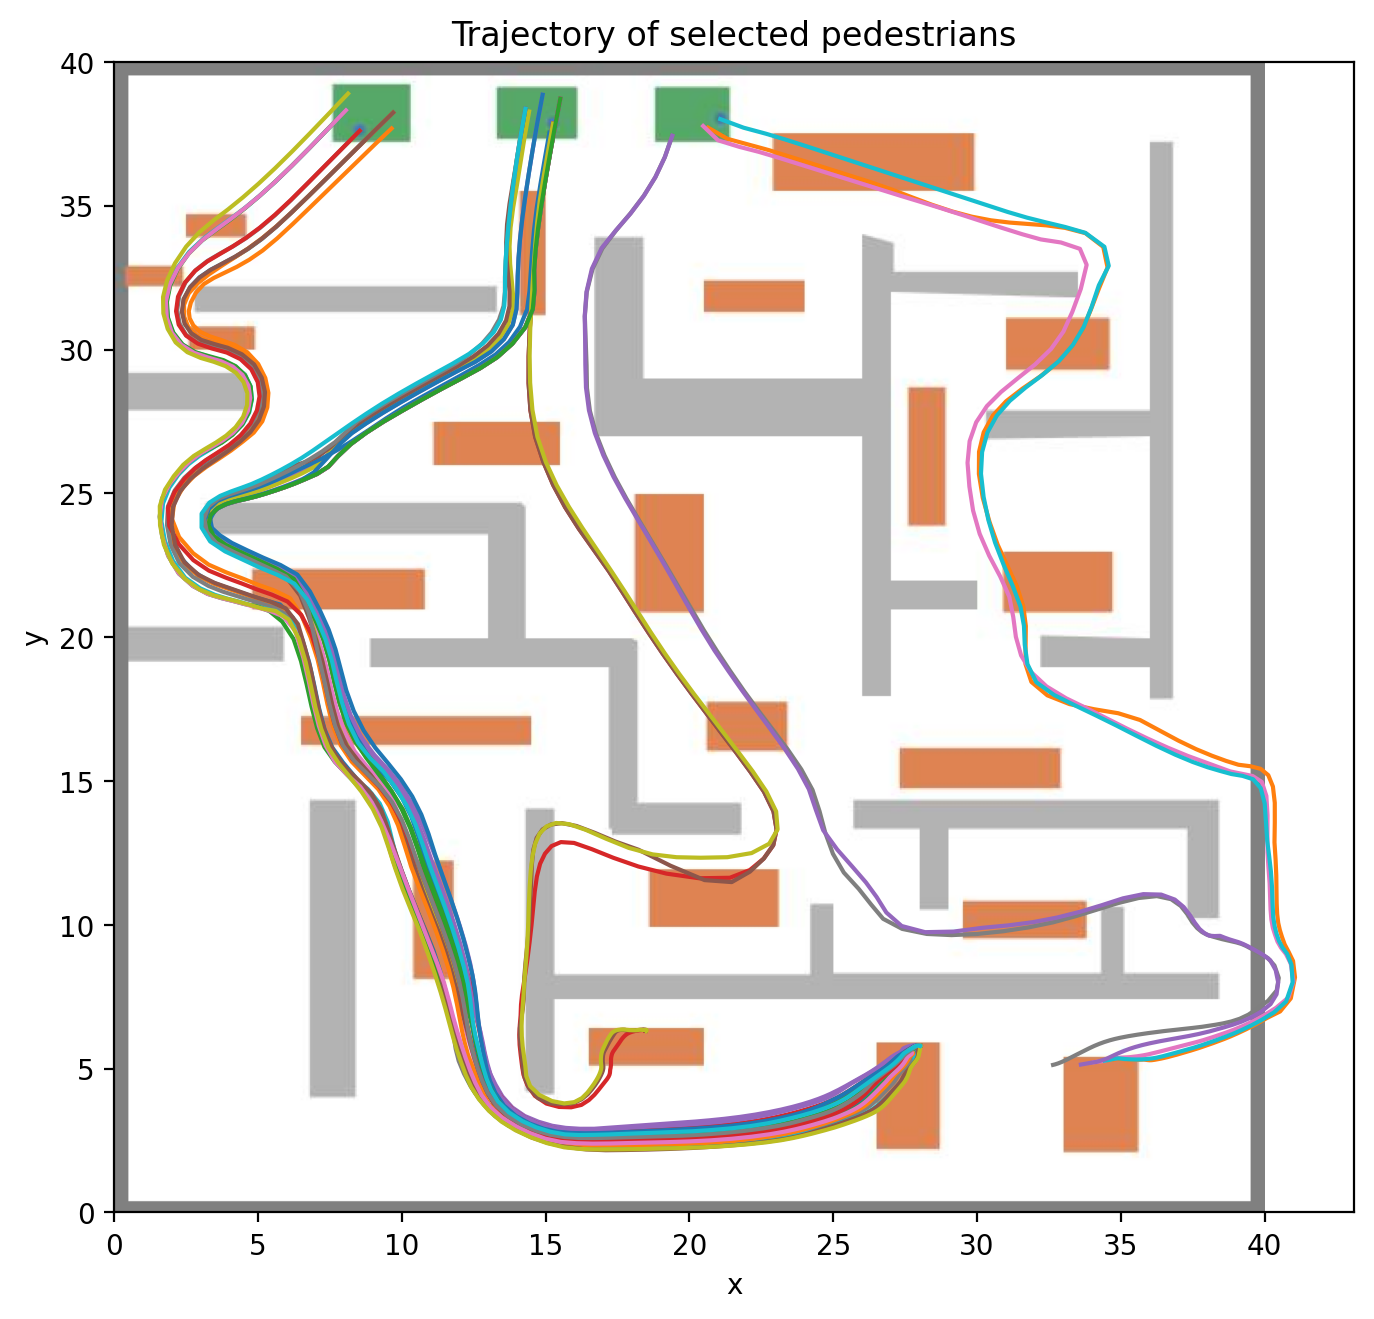

In [35]:
# simluate the trajectory
T_end = 335
num_selected_peds = 30
highest_num_ped = 20
traj = simulateRandomKutta(num_selected_peds, highest_num_ped, T_end, vae, file_path)
image_name = "Task4.1 - Supermarket_VAE_Kutta.png"
plot_traj_supermarket(num_selected_peds, traj, image_name)

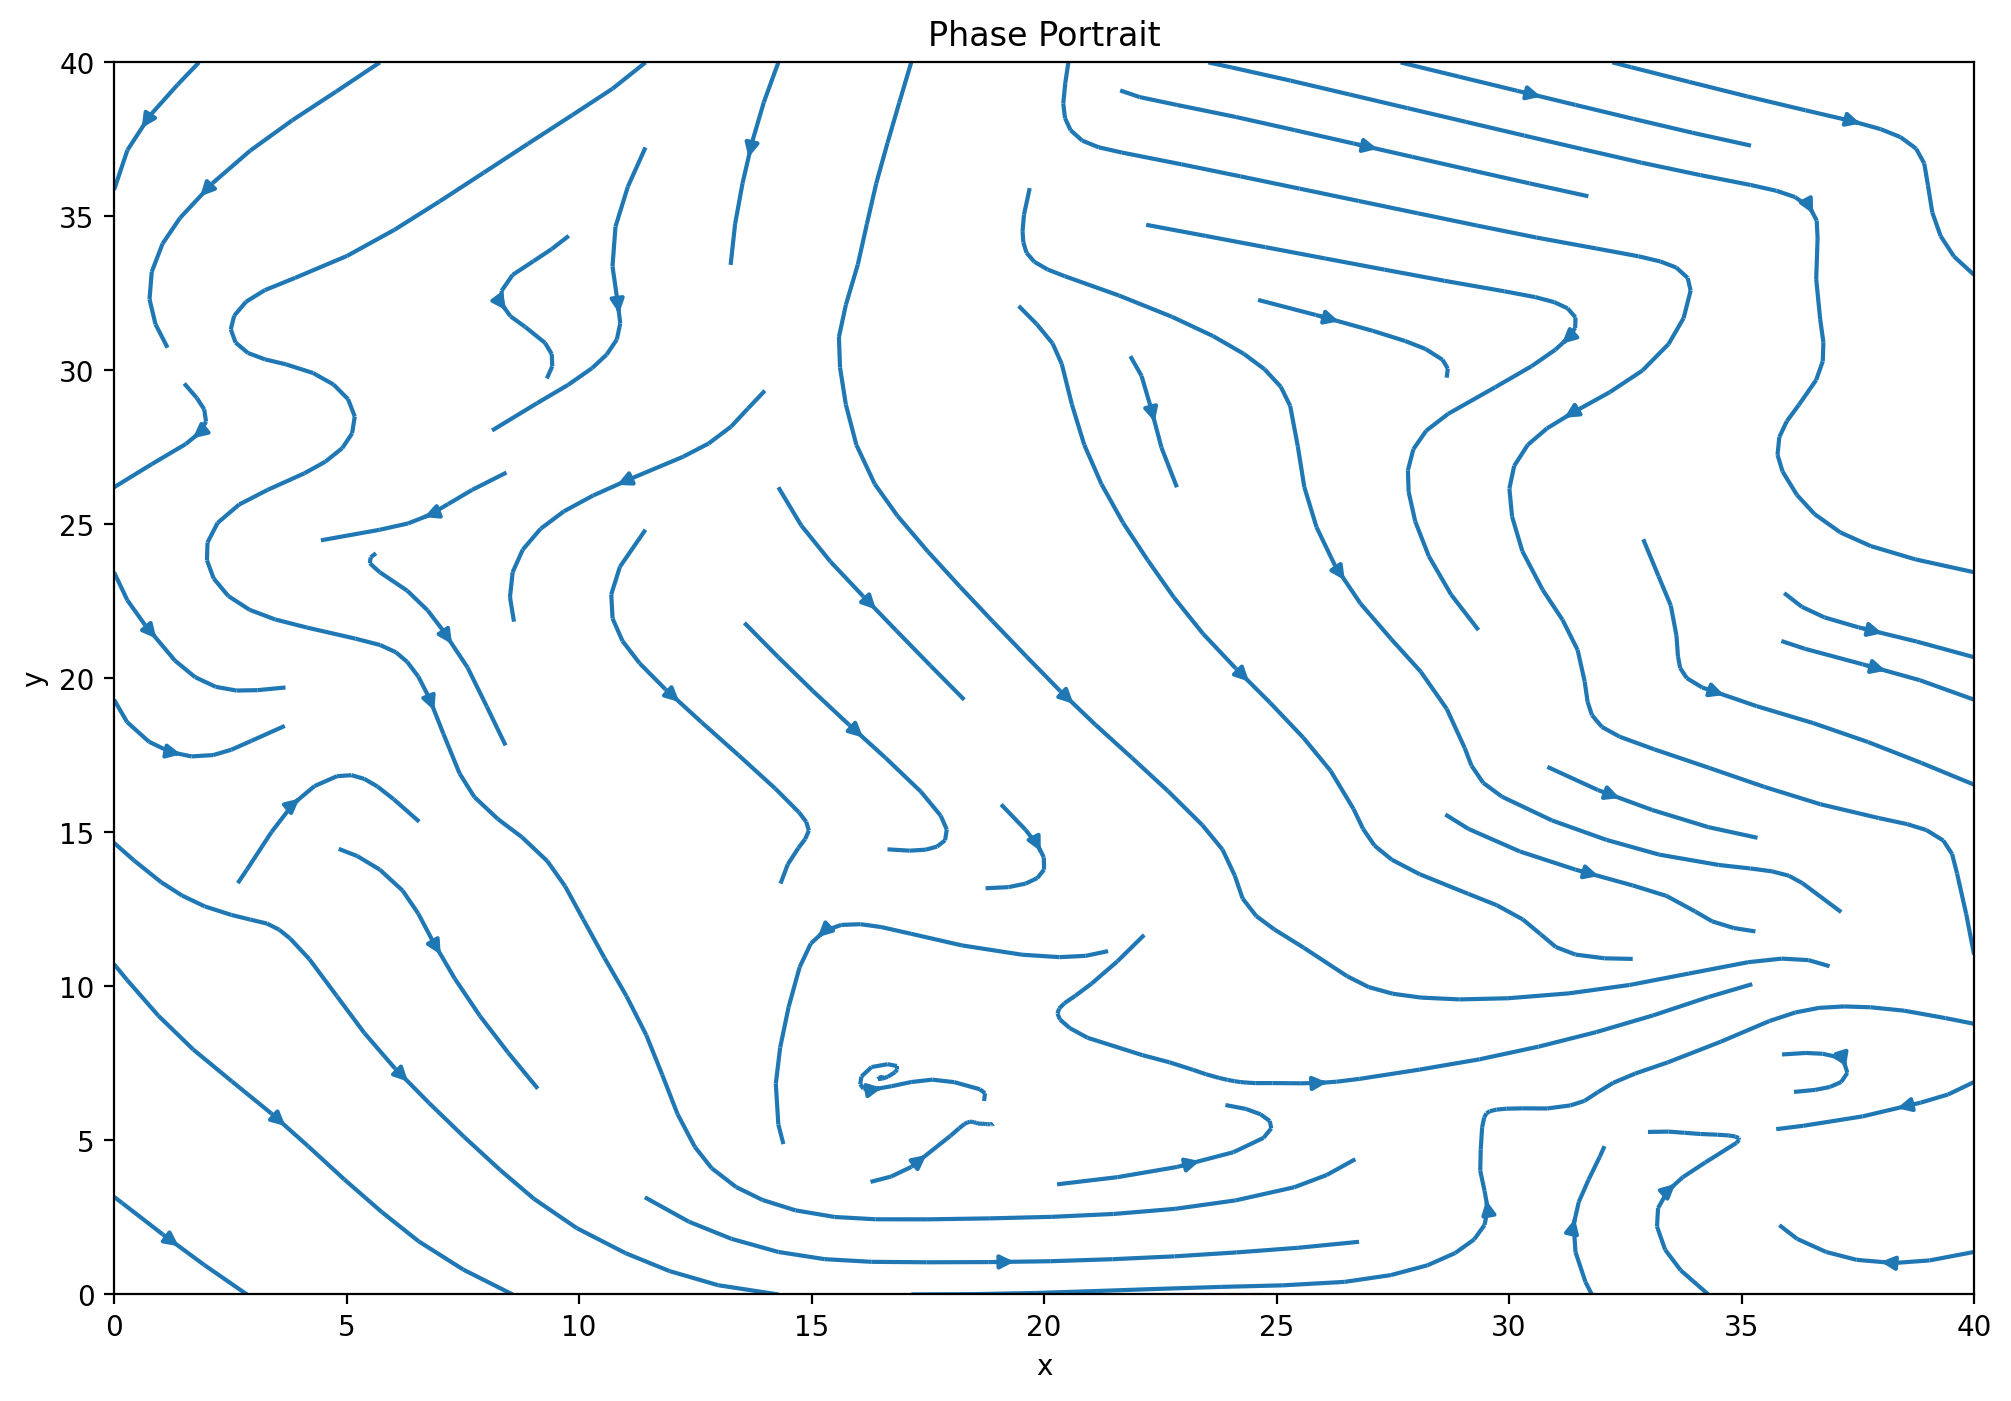

In [36]:
# plot the phase portrait
X, Y, U, V = phase_portrait(vae)
plot_phase_portrait(X, Y, U, V, background=None)